In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#uploading the data
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Supermart Grocery Sales - Retail Analytics Dataset.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
#dropping the duplicates
data=data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 936.9+ KB


In [ ]:
data=data.drop('Discount',axis=1)

In [ ]:
data=data.drop('Profit',axis=1)

In [ ]:
data=data.drop('Category',axis=1)

In [ ]:
data=data.drop('Region',axis=1)

In [ ]:
data=data.drop('State',axis=1)

In [ ]:
#converting categorical data to numeric data
data['Order ID']=pd.Categorical(data['Order ID']).codes 
data['Customer Name']=pd.Categorical(data['Customer Name']).codes 
data['Sub Category']=pd.Categorical(data['Sub Category']).codes 
data['City']=pd.Categorical(data['City']).codes 
data['Order Date']=pd.Categorical(data['Order Date']).codes  

In [ ]:
#checking for any null values
data.isnull().sum()

Order ID         0
Customer Name    0
Sub Category     0
City             0
Order Date       0
Sales            0
dtype: int64

In [ ]:
print('No. of 0 values in Order ID :', data[data['Order ID']==0].shape[0])

In [ ]:
mask = data['Order ID'] == 0
data.loc[mask,'Order ID'] = pd.Series(range(1000,2000)).sample(mask.sum()).values

In [ ]:
print('No. of 0 values in Customer Name :', data[data['Customer Name']==0].shape[0])

In [ ]:
mask = data['Customer Name'] == 0
data.loc[mask,'Customer Name'] = pd.Series(range(1000,2000)).sample(mask.sum()).values

In [ ]:
print('No. of 0 values in Sub Category :', data[data['Sub Category']==0].shape[0])

In [ ]:
mask = data['Sub Category'] == 0
data.loc[mask,'Sub Category'] = pd.Series(range(1000,2000)).sample(mask.sum()).values

In [ ]:
print('No. of 0 values in City :', data[data['City']==0].shape[0])

In [ ]:
mask = data['City'] == 0
data.loc[mask,'City'] = pd.Series(range(1000,2000)).sample(mask.sum()).values

In [ ]:
print('No. of 0 values in Order Date :', data[data['Order Date']==0].shape[0])

In [ ]:
mask = data['Order Date'] == 0
data.loc[mask,'Order Date'] = pd.Series(range(1000,2000)).sample(mask.sum()).values

In [ ]:
print('No. of 0 values in Sales :', data[data['Sales']==0].shape[0])

In [ ]:
mask = data['Sales'] == 0
data.loc[mask,'Sales'] = pd.Series(range(1000,2000)).sample(mask.sum()).values

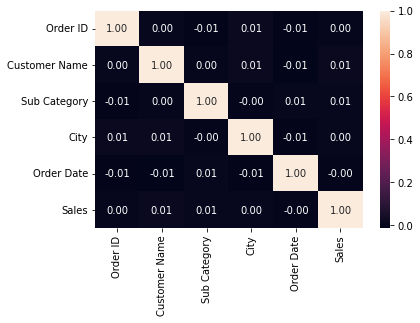

In [ ]:
#correlation
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

In [ ]:
data

In [ ]:
data.info()

In [ ]:
#checking for outliers
def detect_outlier(data):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    lower_bound = q1 - (1.5 * (q3-q1))
    upper_bound = q3 + (1.5 * (q3-q1))

    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

print(detect_outlier((data['Order ID'])))
print(detect_outlier((data['Customer Name'])))

print(detect_outlier((data['Sub Category'])))

print(detect_outlier((data['City'])))
print(detect_outlier((data['Order Date'])))
print(detect_outlier((data['Sales'])))

In [ ]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["Order ID","Customer Name","Sub Category","City","Order Date","Sales"]:
        if pno<=6:
            plt.subplot(3,3,pno);
            pno+=1
            sns.boxplot(data[i]);
            plt.xlabel(i);

In [ ]:
#correcting the outliers
def treat_outliers():
    l = ["Order ID","Customer Name","Sub Category","City","Order Date","Sales"]
    for i in l:
        x = np.quantile(data[i],[0,0.25,0.50,0.75])
        iqr = x[3]-x[1]
        upper_whisker = x[3]+1.5*iqr
        lower_whisker = x[1]-1.5*iqr
        data[i] = np.where(data[i]>upper_whisker,upper_whisker,(np.where(data[i]<lower_whisker,lower_whisker,data[i])))
treat_outliers()

In [ ]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["Order ID","Customer Name","Sub Category","City","Order Date","Sales"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(data[i]);
            plt.xlabel(i); 

In [ ]:
#after treating outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = data.drop(columns = ["Sales"])
res=cal_vif(X)
print(res)

In [ ]:
#splitting the data 
x = data.drop(columns = ["Sales"])
y = data["Sales"]

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=7)

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='entropy')
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#SVM
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
#naive-bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
#KNeighborsClassifier (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#making the predictions by various algorithms

In [ ]:
x_test.shape

In [ ]:
dc_pred=dc.predict(x_test)

In [ ]:
dc_pred.shape

(1999,)

In [ ]:
sv_pred=sv.predict(x_test)

In [ ]:
sv_pred.shape

In [ ]:
nb_pred=nb.predict(x_test)

In [ ]:
nb_pred.shape

In [ ]:
knn_pred=dc.predict(x_test)

In [ ]:
knn_pred.shape

In [ ]:
from sklearn.metrics import accuracy_score
print("Train accuracy of decision tree", dc.score(x_train, y_train)*100)
print("Accuracy test score of decision tree", dc.score(x_test, y_test)*100)
print("Accuracy test score of decision tree", accuracy_score(y_test, dc_pred)*100)

Train accuracy of decision tree 100.0
Accuracy test score of decision tree 0.05002501250625312
Accuracy test score of decision tree 0.05002501250625312


In [ ]:
from sklearn.metrics import accuracy_score
print("Train accuracy of svm", sv.score(x_train, y_train)*100)
print("Accuracy test score of svm", sv.score(x_test, y_test)*100)
print("Accuracy test score of svm", accuracy_score(y_test, sv_pred)*100)

Train accuracy of svm 0.23764853033145716
Accuracy test score of svm 0.10005002501250625
Accuracy test score of svm 0.10005002501250625


In [ ]:
from sklearn.metrics import accuracy_score
print("Train accuracy of naive-bayes", nb.score(x_train, y_train)*100)
print("Accuracy test score of naive-bayes", nb.score(x_test, y_test)*100)
print("Accuracy test score of naive-bayes", accuracy_score(y_test, nb_pred)*100)

Train accuracy of naive-bayes 6.679174484052533
Accuracy test score of naive-bayes 0.0
Accuracy test score of naive-bayes 0.0


In [ ]:
from sklearn.metrics import accuracy_score
print("Train accuracy of knn", knn.score(x_train, y_train)*100)
print("Accuracy test score of knn", knn.score(x_test, y_test)*100)
print("Accuracy test score of knn", accuracy_score(y_test, knn_pred)*100)

Train accuracy of knn 20.400250156347717
Accuracy test score of knn 0.05002501250625312
Accuracy test score of knn 0.10005002501250625
